In [2]:
import os, sys
import numpy as np
import healpy as hp
import pandas as pd
import h5py
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 15})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'


kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple

Lmod has detected the following error: The following module(s) are unknown:
"texlive/2022"

Please check the spelling or version number. Also try "module spider ..."
It is also possible your cache file is out-of-date; it may help to try:
  $ module --ignore_cache load "texlive/2022"

Also make sure that all modulefiles written in TCL start with the string
#%Module





In [3]:
desy3rowe = h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/desy3/YOCALIB-1000JK-catms/rowe_stats.hdf5')
hscy3rowe = h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/hsc-y3/outputs/TAU_150JK-catms/rowe_stats.hdf5')
kidsrowe = h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/kids/TAU_catms/rowe_stats.hdf5')


<Figure size 640x480 with 0 Axes>

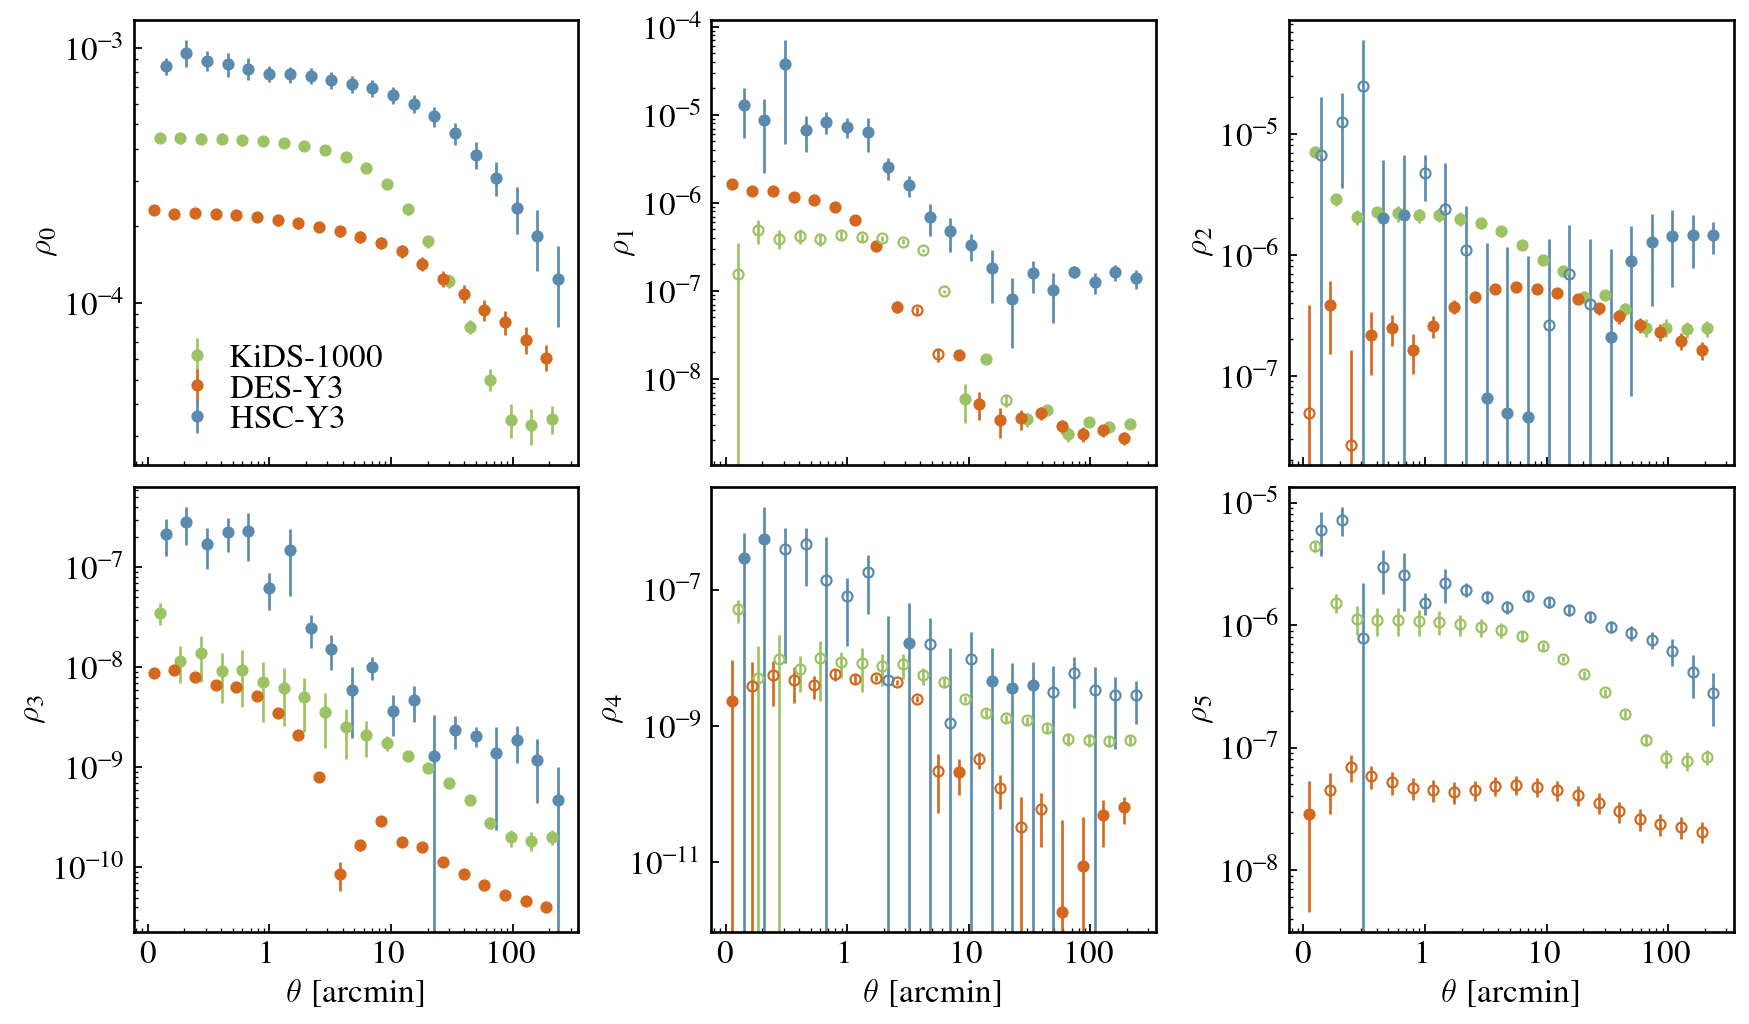

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

matplotlib.rcParams.update({'font.size': 15})

plt.clf()
fig = plt.figure(figsize=(10,6),dpi=80)
gs  = gridspec.GridSpec(2, 3, top=0.95, right=1.00, left=0.00, bottom=0.00,hspace=0.05,wspace=0.3)
#gs  = gridspec.GridSpec(2, 3, top=0.95, right=1.00, left=0.00, bottom=0.00,hspace=0.25,wspace=0.15)
ax0 = plt.subplot(gs[0])
i = 0
ax0.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][:])+0),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus']),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err']), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax0.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][:])-0.05),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus']),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err']), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label='DES-Y3')
ax0.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][:])+0.05),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus']),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err']), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')
ax0.set_xscale('log')
ax0.set_ylabel(rf'$\rho_{i}$')
#ax0.set_xlabel(rf'$\theta$ [arcmin]')
ax0.tick_params(axis="both",which='both',direction="in")
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_yscale('log')
ax0.legend(frameon=False,loc = 'lower left', labelspacing=0.00,ncol=1,handletextpad=0.00,columnspacing=0.2)


i = 1

ax1 = plt.subplot(gs[1])
ax1.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax1.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])-0.05),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label='DES-Y3')

ax1.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0.05),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax1.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='none',elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax1.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='none',elinewidth=1.2,color=descol,label='DES-Y3')

ax1.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0.05),
                    np.array(np.abs(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='none', elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax1.set_xscale('log')
#plt.ylim([9e-5, 2.5e-3])
ax1.set_yscale('log')
ax1.set_ylabel(rf'$\rho_{i}$')
ax1.tick_params(axis="both",which='both',direction="in")
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.set_xlabel(rf'$\theta$ [arcmin]')

i = 2
ax2 = plt.subplot(gs[2])
ax2.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax2.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label='DES-Y3')

ax2.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')


ax2.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax2.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=descol,label='DES-Y3')

ax2.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax2.set_xscale('log')
ax2.set_ylabel(rf'$\rho_{i}$')
#ax2.set_xlabel(rf'$\theta$ [arcmin]')
ax2.set_yscale('log')
ax2.tick_params(axis="both",which='both',direction="in")
plt.setp(ax2.get_xticklabels(), visible=False)


i = 3
ax3 = plt.subplot(gs[3])
ax3.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax3.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label='DES-Y3')

ax3.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax3.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax3.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=descol,label='DES-Y3')

ax3.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax3.tick_params(axis="both",which='both',direction="in")
ax3.set_xscale('log')
ax3.set_ylabel(rf'$\rho_{i}$')
ax3.set_xlabel(rf'$\theta$ [arcmin]')
ax3.set_yscale('log')

i = 4
ax4 = plt.subplot(gs[4])
ax4.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax4.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label='DES-Y3')

ax4.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax4.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax4.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=descol,label='DES-Y3')

ax4.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax4.tick_params(axis="both",which='both',direction="in")
ax4.set_xscale('log')
ax4.set_ylabel(rf'$\rho_{i}$')
ax4.set_xlabel(rf'$\theta$ [arcmin]')
ax4.set_yscale('log')

i = 5
ax5 = plt.subplot(gs[5])
ax5.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax5.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label='DES-Y3')

ax5.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]>0]), marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax5.errorbar(10**(np.log10(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0),
                    np.abs(np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][kidsrowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=kidscol,label='KiDS-1000')

ax5.errorbar(10**(np.log10(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])-0.05),
                    np.abs(np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][desy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',ms=4.5,mfc='None',elinewidth=1.2,color=descol,label='DES-Y3')

ax5.errorbar(10**(np.log10(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/theta'][:][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])+0.05),
                    np.abs(np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0])),
                    np.array(hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xip_err'][hscy3rowe[f'rowe_statistics/rowe_{i}_PSF-reserved/xi_plus'][:]<0]), marker='o',ls='None',mfc='None',ms=4.5,elinewidth=1.2,color=hsccol,label='HSC-Y3')

ax5.tick_params(axis="both",which='both',direction="in")
ax5.set_xscale('log')
ax5.set_ylabel(rf'$\rho_{i}$')
ax5.set_xlabel(rf'$\theta$ [arcmin]')
ax5.set_yscale('log')

from matplotlib.ticker import ScalarFormatter
for axis in [ax3.xaxis,ax4.xaxis,ax5.xaxis]:
    axis.set_major_formatter(ScalarFormatter())

for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.2)
    ax1.spines[axis].set_linewidth(1.2)
    ax2.spines[axis].set_linewidth(1.2)
    ax3.spines[axis].set_linewidth(1.2)
    ax4.spines[axis].set_linewidth(1.2)
    ax5.spines[axis].set_linewidth(1.2)


plt.savefig('rowes.pdf',bbox_inches='tight')
